In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import custom functions
from scripts.data_preprocessing import preprocess_data
import joblib


In [4]:
# Preprocess the data using the function from our script
X_scaled, y = preprocess_data('data/credit_score.csv')

# Ensure 'y' is a pandas Series
if isinstance(y, pd.DataFrame):
    y = y.squeeze()

# Display the shapes of the features and target variable
print(f"Features shape: {X_scaled.shape}")
print(f"Target shape: {y.shape}")


Features shape: (1000, 1084)
Target shape: (1000,)


In [5]:
# Display the first five rows of the features
X_scaled.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,CUST_ID_CZP8X31GN9,CUST_ID_CZPS645EDZ,CUST_ID_CZPWHY47MO,CUST_ID_CZQHJC9HDH,CUST_ID_CZRA4MLB0P,CUST_ID_CZSOD1KVFX,CUST_ID_CZWC76UAUT,CUST_ID_CZZV5B3SAL,CAT_GAMBLING_Low,CAT_GAMBLING_No
0,-0.777240,-0.933351,-0.263339,-1.024549,1.699167,-0.278144,-0.659327,-0.492793,0.192660,0.033098,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.362245,-1.277333
1,-0.391097,-0.727370,-0.484123,-0.726575,-0.338334,-0.143371,-0.134234,-0.655799,-1.847030,0.528442,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.362245,0.782881
2,-0.797934,-0.884465,-0.260730,-0.848054,1.921581,1.123182,-0.757155,-0.509407,1.222678,-0.483552,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.362245,-1.277333
3,-0.360312,-0.787594,-0.164673,-0.822840,0.296247,0.231386,0.004624,0.042937,0.350766,0.784103,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.362245,-1.277333
4,0.249525,1.715197,1.639472,0.946701,1.699167,-0.227697,-0.647432,-0.614559,-1.237920,-1.128032,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.362245,-1.277333


In [6]:
# Display the first five rows of the target variable
y.head()

0    444
1    625
2    469
3    559
4    473
Name: CREDIT_SCORE, dtype: int64

In [8]:
# Summary statistics of the features
X_scaled.describe()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,CUST_ID_CZP8X31GN9,CUST_ID_CZPS645EDZ,CUST_ID_CZPWHY47MO,CUST_ID_CZQHJC9HDH,CUST_ID_CZRA4MLB0P,CUST_ID_CZSOD1KVFX,CUST_ID_CZWC76UAUT,CUST_ID_CZZV5B3SAL,CAT_GAMBLING_Low,CAT_GAMBLING_No
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.552714e-18,-2.842171e-17,-2.664535e-17,-8.171241e-17,2.842171e-17,5.329071e-18,2.486900e-17,-1.953993e-17,1.261213e-16,-2.664535e-17,...,-1.598721e-17,-1.598721e-17,-1.598721e-17,-1.598721e-17,-1.598721e-17,-1.598721e-17,-1.598721e-17,-1.598721e-17,-9.592327e-17,4.796163e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,...,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.069947e+00,-9.333515e-01,-8.057868e-01,-1.024549e+00,-1.038237e+00,-3.496583e-01,-9.117832e-01,-6.774943e-01,-1.927990e+00,-1.389019e+00,...,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.622454e-01,-1.277333e+00
25%,-8.020404e-01,-7.984509e-01,-7.507916e-01,-7.724131e-01,-7.893903e-01,-3.373698e-01,-7.668446e-01,-6.150478e-01,-8.091699e-01,-6.886135e-01,...,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.622454e-01,-1.277333e+00
50%,-3.213098e-01,-3.147522e-01,-4.031619e-01,-3.827494e-01,-1.979313e-01,-2.304685e-01,-3.111803e-01,-4.226267e-01,5.935150e-02,-2.332165e-01,...,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.622454e-01,7.828814e-01
75%,5.244375e-01,4.722679e-01,4.101826e-01,5.656983e-01,4.309745e-01,-8.090916e-02,4.445181e-01,2.128809e-01,7.267438e-01,3.686532e-01,...,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.163860e-02,-3.622454e-01,7.828814e-01
max,4.755277e+00,5.644238e+00,5.276577e+00,3.037666e+00,5.292113e+00,1.710224e+01,4.869053e+00,7.124502e+00,2.557887e+00,5.223558e+00,...,3.160696e+01,3.160696e+01,3.160696e+01,3.160696e+01,3.160696e+01,3.160696e+01,3.160696e+01,3.160696e+01,2.760560e+00,7.828814e-01


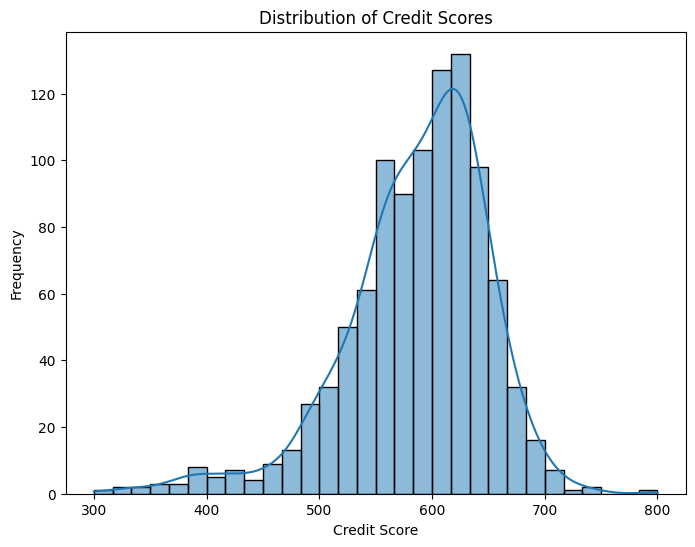

In [9]:
# Plot the distribution of the credit scores
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

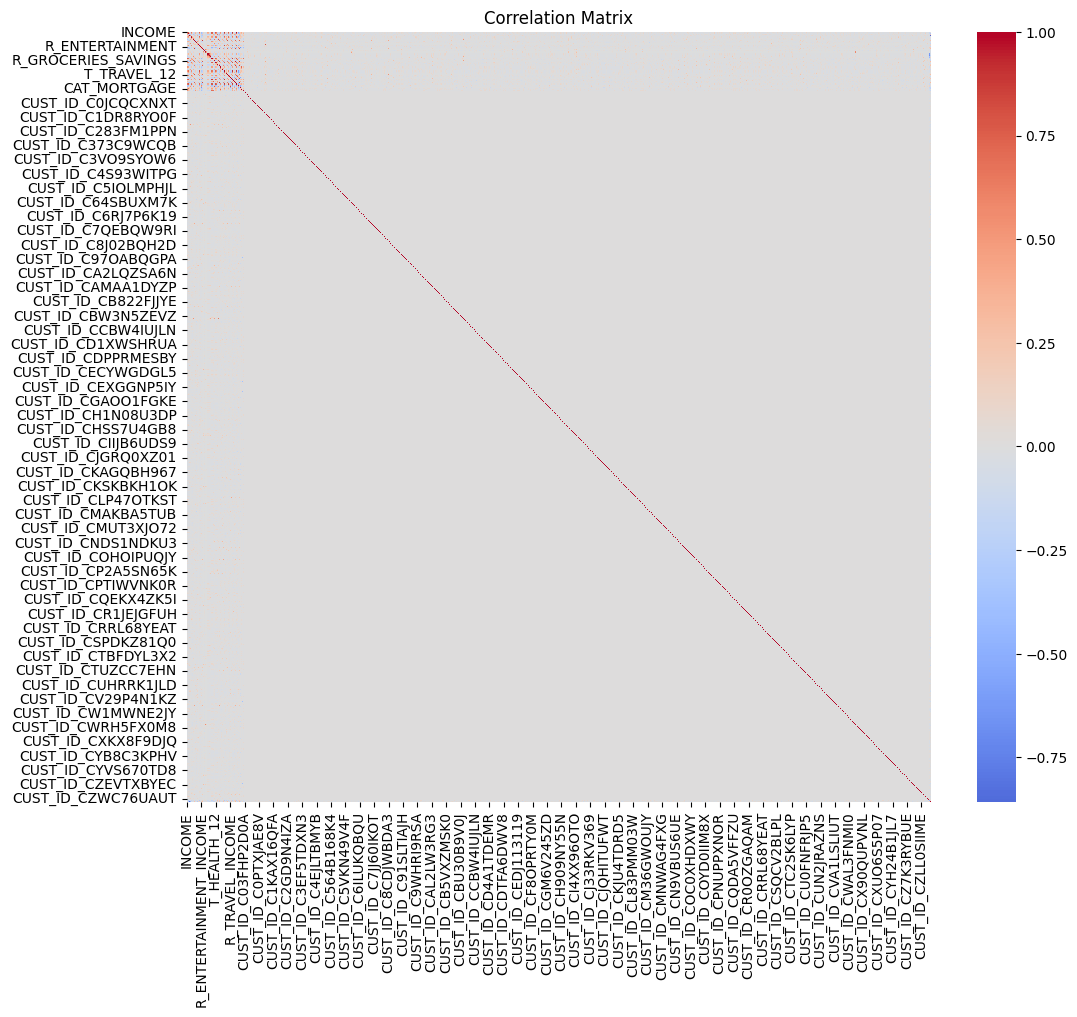

In [10]:
# Combine the scaled features and target variable
df_combined = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Compute the correlation matrix
corr_matrix = df_combined.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Load the trained Linear Regression model
lr_model = joblib.load('models/credit_score_model.pkl')

In [15]:
# Get feature names from X_scaled
feature_names = X_scaled.columns

# Get the coefficients from the Linear Regression model
coefficients = lr_model.coef_

# If coefficients are in a 2D array, flatten it
if coefficients.ndim > 1:
    coefficients = coefficients.flatten()

# Create a DataFrame to pair feature names with coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Calculate the absolute value of coefficients to assess magnitude
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()

# Sort the DataFrame by absolute coefficient values in descending order
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top 10 features
print("Top 10 most influential features on Credit Score:")
coef_df_sorted.head(10)

Top 10 most influential features on Credit Score:


,Feature,Coefficient,Abs_Coefficient
4,R_DEBT_INCOME,-17.853571,17.853571
81,CAT_SAVINGS_ACCOUNT,6.262059,6.262059
2,DEBT,-6.087515,6.087515
5,R_DEBT_SAVINGS,-5.621001,5.621001
704,CUST_ID_CN1V5NORB2,5.173398,5.173398
469,CUST_ID_CDZMSZ6XNS,-4.554914,4.554914
74,R_EXPENDITURE,-4.182059,4.182059
954,CUST_ID_CVQKIGJTFS,-4.167538,4.167538
853,CUST_ID_CSC000U481,-4.061411,4.061411
606,CUST_ID_CJM3WVGMM1,-4.008889,4.008889


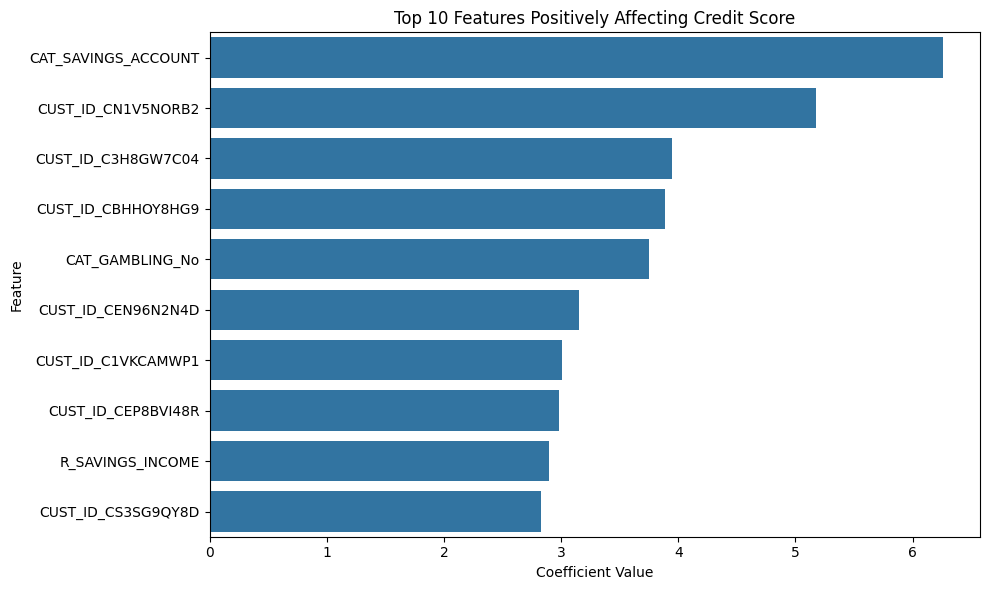

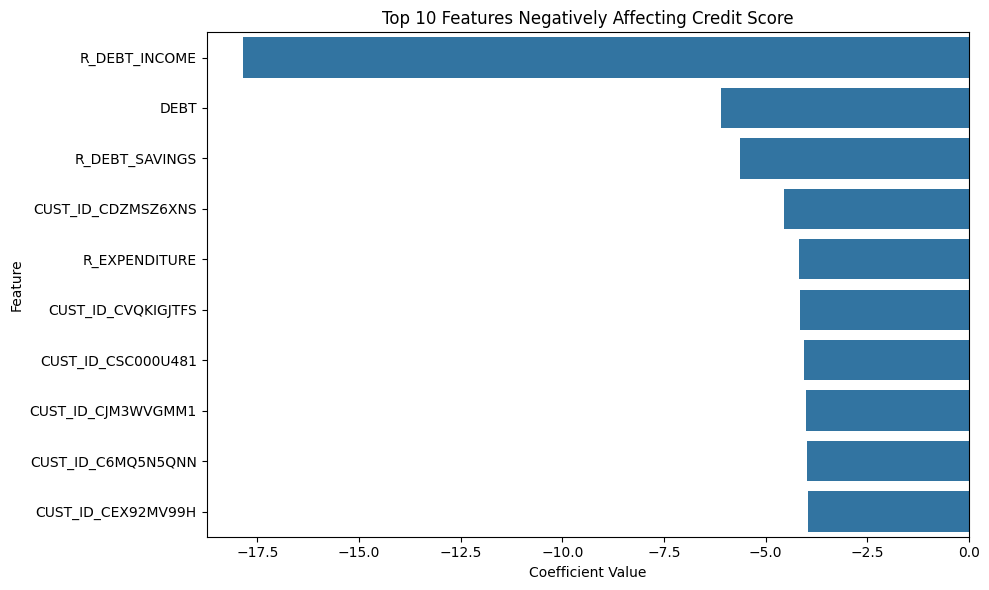

In [16]:
# Separate positive and negative coefficients
positive_coefficients = coef_df_sorted[coef_df_sorted['Coefficient'] > 0].head(10)
negative_coefficients = coef_df_sorted[coef_df_sorted['Coefficient'] < 0].head(10)

# Plot top positive coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=positive_coefficients)
plt.title('Top 10 Features Positively Affecting Credit Score')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Plot top negative coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=negative_coefficients)
plt.title('Top 10 Features Negatively Affecting Credit Score')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [17]:
# Load test data
X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv')

# Ensure 'y_test' is a Series
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.squeeze()

# Ensure that feature names in X_test match those used in training
X_test.columns = X_scaled.columns

In [20]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)

In [22]:
# Print shapes of y_test and y_pred
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

Shape of y_test: (200,)
Shape of y_pred: (200, 1)


In [21]:
# Calculate residuals
residuals = y_test - y_pred

ValueError: Data must be 1-dimensional, got ndarray of shape (200, 200) instead